In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('xmm_panstarrs_gaia_wise_simbad').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

index = [i[0] for i in rows[1:]]
adjusted_rows = [i[1:] for i in rows[1:]]

import pandas as pd
df = pd.DataFrame.from_records(adjusted_rows, columns=rows[0][1:], index=index)

df.head()

,SC_RA,SC_DEC,SC_EP_8_FLUX,SC_EP_8_FLUX_ERR,objID,RAJ2000,DEJ2000,gmag,e_gmag,rmag,...,W1mag,W2mag,W3mag,W4mag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,nbref,main_type
207009901010024,0.006905748378,68.13455524,2.89E-14,8.30E-15,189760000053982249,0.00535066,68.13450866,,,,...,15.124,14.485,11.595,8.903,0.04,0.065,0.241,0.44,,
201253101010057,0.007534431099,-25.28516856,1.79E-14,1.35E-14,77650000066568040,0.00666557,-25.28524502,21.3264,0.0372,20.9832,...,16.85,16.382,12.454,9.144,0.141,0.361,,,,
206584004010022,0.00871585155,44.5149709,2.56E-14,1.06E-14,161410000079588615,0.00789686,44.51494177,19.6866,0.0137,19.4907,...,15.728,15.175,11.587,8.89,0.052,0.083,0.136,,,
203025805010017,0.01007083288,-32.25863789,1.91E-14,3.96E-15,69290000106580013,0.01062854,-32.25865907,,,,...,15.836,15.038,12.265,8.723,0.064,0.101,0.385,,,
201253101010009,0.0112696999,-25.19337615,7.40E-14,1.33E-14,77760000111487954,0.0111867,-25.19365618,21.6948,0.0807,21.372,...,,,,,,,,,6,Seyfert_1


In [ ]:
df.describe()

,SC_RA,SC_DEC,SC_EP_8_FLUX,SC_EP_8_FLUX_ERR,objID,RAJ2000,DEJ2000,gmag,e_gmag,rmag,...,W1mag,W2mag,W3mag,W4mag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,nbref,main_type
count,221124,221124,221124,221124,221124,221124,221124,221124,221124,221124,...,221124,221124,221124,221124,221124,221124,221124,221124,221124,221124
unique,221111,221117,3942,2999,221063,221081,221087,62264,3451,66406,...,11756,10959,8474,7139,467,536,540,544,542,145
top,187.6519391,-29.24394741,1.03E-14,1.01E-14,7.93428E+16,10.70220067,27.87393436,,,,...,,,,,,,,,,
freq,2,2,636,952,3,2,2,53192,62607,29059,...,81635,81635,81734,81741,81812,84434,132050,177871,157489,157489


In [ ]:
df.shape

(221124, 34)

In [ ]:
import numpy as np
df = df.replace('',np.nan)

In [ ]:
df.isnull().sum()

SC_RA                    0
SC_DEC                   0
SC_EP_8_FLUX             0
SC_EP_8_FLUX_ERR         0
objID                    0
RAJ2000                  0
DEJ2000                  0
gmag                 53192
e_gmag               62607
rmag                 29059
e_rmag               39114
imag                  8790
e_imag               18515
zmag                 24377
e_zmag               33108
ymag                 70298
e_ymag               75552
parallax            130534
parallax_error      130534
pm                  130534
pmra                130534
pmra_error          130534
pmdec               130534
pmdec_error         130534
W1mag                81635
W2mag                81635
W3mag                81734
W4mag                81741
e_W1mag              81812
e_W2mag              84434
e_W3mag             132050
e_W4mag             177871
nbref               157489
main_type           157489
dtype: int64

In [ ]:
for i in range(len(df.columns)):
  try:
    df[df.columns[i]] = df[df.columns[i]].apply(pd.to_numeric)
  except:
    print(i)
    pass
df.dtypes

33


SC_RA               float64
SC_DEC              float64
SC_EP_8_FLUX        float64
SC_EP_8_FLUX_ERR    float64
objID               float64
RAJ2000             float64
DEJ2000             float64
gmag                float64
e_gmag              float64
rmag                float64
e_rmag              float64
imag                float64
e_imag              float64
zmag                float64
e_zmag              float64
ymag                float64
e_ymag              float64
parallax            float64
parallax_error      float64
pm                  float64
pmra                float64
pmra_error          float64
pmdec               float64
pmdec_error         float64
W1mag               float64
W2mag               float64
W3mag               float64
W4mag               float64
e_W1mag             float64
e_W2mag             float64
e_W3mag             float64
e_W4mag             float64
nbref               float64
main_type            object
dtype: object

In [ ]:
def is_AGN(classification, ref):
  value = "Unknown"
  try:
    if classification in ["QSO", "Seyfert_1", "Seyfert_2", "BLLac", "Blazar", "RadioG", "AGN"] and ref>=3:
      return True
    elif pd.isna(classification):
      return value
    elif ref<3 or "Candidate" in classification:
      return value
    else:
      return False
  except Exception as e:
    print(e)
    print(classification, ref)
    input()

df["is_AGN"] = df.apply(lambda x: is_AGN(x.main_type, x.nbref), axis=1)
df.is_AGN.value_counts()

Unknown    186387
True        23068
False       11669
Name: is_AGN, dtype: int64

In [ ]:
df.main_type.unique()

array([nan, 'Seyfert_1', 'BClG', 'Star', 'QSO', 'Galaxy', 'YSO_Candidate',
       'AGN', 'Radio', 'EmG', 'Seyfert_2', 'PM*', 'CataclyV*', 'LINER',
       'X', 'RotV*', 'LP*_Candidate', 'Eruptive*', 'Blue', 'SB*',
       'QSO_Candidate', 'EB*', 'GinCl', 'UV', 'PulsV*', 'HotSubdwarf',
       'RadioG', 'CV*_Candidate', 'WD*', 'Cl*', 'ClG', 'LSB_G', 'Seyfert',
       'GinGroup', 'BLLac', 'low-mass*', 'V*', 'EB*_Candidate', 'Em*',
       'AGN_Candidate', 'GlCl', 'C*', '**', 'Unknown_Candidate', 'RSCVn',
       'HMXB', 'Irregular_V*', 'RGB*', 'Nova', 'ClG_Candidate', 'EmObj',
       'SNR', 'XB*_Candidate', 'SNR?_Candidate', 'PN?_Candidate',
       'RedSG*', 'HII', 'deltaCep', 'WR*', 'LMXB', 'Orion_V*',
       'RSG*_Candidate', 'XB', 'GlCl?_Candidate', 'Transient', 'Cepheid',
       'BlueStraggler', 'PN', 'HB*', 'GravLensSystem', 'RRLyr', 'BYDra',
       'Nova_Candidate', 'Symbiotic*', 'Blazar', 'WD*_Candidate', 'S*',
       'ULX', 'NIR', 'SN', 'LPV*', 'AGB*_Candidate', 'MIR', 'IG', 'Ae*',
  

In [ ]:
df = df[(abs(df["parallax"]/df["parallax_error"])<=3) | (df["parallax"].isnull())]
df.shape

(182923, 35)

In [ ]:
df = df[(abs(df.pmra/df.pmra_error)<=3) | df.pmra.isnull()]
df.shape

(171728, 35)

In [ ]:
df = df[(abs(df.pmdec/df.pmdec_error)<=3) | df.pmdec.isnull()]
df.shape

(167268, 35)

In [ ]:
df.isnull().sum()

SC_RA                    0
SC_DEC                   0
SC_EP_8_FLUX             0
SC_EP_8_FLUX_ERR         0
objID                    0
RAJ2000                  0
DEJ2000                  0
gmag                 49388
e_gmag               52113
rmag                 27039
e_rmag               29484
imag                  7697
e_imag                9281
zmag                 22992
e_zmag               24172
ymag                 68587
e_ymag               69296
parallax            130534
parallax_error      130534
pm                  130534
pmra                130534
pmra_error          130534
pmdec               130534
pmdec_error         130534
W1mag                62117
W2mag                62118
W3mag                62185
W4mag                62161
e_W1mag              62283
e_W2mag              64682
e_W3mag             100707
e_W4mag             134730
nbref               120135
main_type           120135
is_AGN                   0
dtype: int64

In [ ]:
df.is_AGN.value_counts()

Unknown    140431
True        22668
False        4169
Name: is_AGN, dtype: int64

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [ ]:
input_labels = ['gmag', 'ymag','rmag', "zmag", 'imag', "W1mag", "W2mag", "W3mag", "W4mag", "SC_EP_8_FLUX", "is_AGN"]
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
logreg_model = LogisticRegression(max_iter=500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg_model.fit(X_train, y_train)

y_pred1 = logreg_model.predict(X_test)
model_stats(y_test, y_pred1)

Accuracy:  0.9289678135405105
Precision:  0.9499666444296198
Recall:  0.964116452268111


In [ ]:
np.unique(y_pred1, return_counts = True)

(array([0, 1]), array([ 606, 2998]))

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_model, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.92175361 0.90896475 0.91951152 0.92533999 0.92311962]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Regression_model = RandomForestClassifier(n_estimators = 200, random_state = 0)
Regression_model.fit(X_train, y_train)

y_pred2 = Regression_model.predict(X_test)
model_stats(y_test, y_pred2)

Accuracy:  0.9317425083240843
Precision:  0.9489389920424404
Recall:  0.968855788761002


In [ ]:
scores = cross_val_score(Regression_model, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.91759156 0.91479323 0.92617263 0.92672773 0.92339717]


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

known_df = df[df["is_AGN"] != "Unknown"]
known_df = known_df[input_labels]
y = known_df["is_AGN"].astype(int)
X = known_df.drop("is_AGN", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Hist_tree = HistGradientBoostingClassifier(early_stopping = True).fit(X_train, y_train)
y_pred6 = Hist_tree.predict(X_test)

model_stats(y_test, y_pred6)

Accuracy:  0.930886736214605
Precision:  0.9466809421841542
Recall:  0.9731454985692274


In [ ]:
scores = cross_val_score(Hist_tree, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.91710134 0.91970939 0.92789268 0.93329607 0.93907211]


In [ ]:
known_df = df[df["is_AGN"] == "Unknown"]
input_df = known_df[input_labels]
X = input_df.drop("is_AGN", axis=1)

unknown_pred = Hist_tree.predict(X)
known_df["predicted"] = unknown_pred
known_df.predicted.value_counts()

<ipython-input-27-66380637d913>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_df["predicted"] = unknown_pred


1    113000
0     27431
Name: predicted, dtype: int64

In [ ]:
known_df = df[df["is_AGN"] == "Unknown"]
input_df = known_df[input_labels].dropna()
X = input_df.drop("is_AGN", axis=1)

unknown_pred = Regression_model.predict(X)
input_df["predicted"] = unknown_pred
input_df.predicted.value_counts()

1    38887
0     5558
Name: predicted, dtype: int64

<Axes: xlabel='gmag', ylabel='Count'>

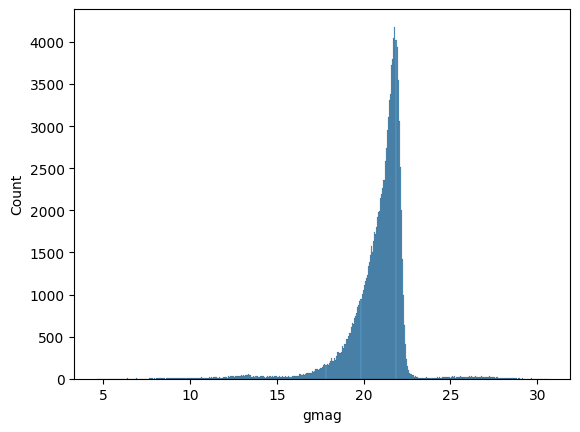

In [ ]:
import seaborn as sns

sns.histplot(data = df, x= "gmag")

(array([3.7000e+01, 1.5960e+03, 4.6649e+04, 9.4028e+04, 2.1173e+04,
        2.8100e+03, 7.8700e+02, 1.6400e+02, 1.7000e+01, 7.0000e+00]),
 array([-16.12033079, -15.35389091, -14.58745103, -13.82101114,
        -13.05457126, -12.28813138, -11.52169149, -10.75525161,
         -9.98881172,  -9.22237184,  -8.45593196]),
 <BarContainer object of 10 artists>)

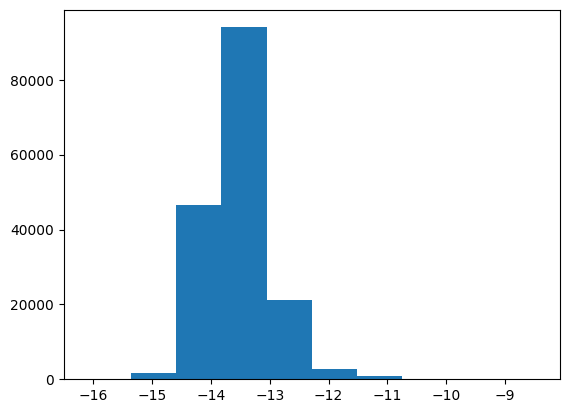

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(np.log10(df["SC_EP_8_FLUX"].values))